In [4]:
### Common block

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

EXCELS_PATH = "./excels"

excel_files = sorted([f for f in os.listdir(EXCELS_PATH) if f.endswith(".xlsx") or f.endswith(".xls")])


## Top500 history

In [5]:

def process_file(fname):
    file = os.path.join(EXCELS_PATH, fname)
    year, mon = int(fname[7:11]), int(fname[12:14])
    print(f"--- Parsed {file} {year} {mon} ..")
    df = pd.read_excel(file, header=0)
    if len(df) > 500:
       df = pd.read_excel(file, skiprows=1)

    df.columns = df.columns.str.lower()   ## make all lower case
    #print(df.columns)
    
    frmax = 1 
    krmax = 'rmax' 
    if year >=2017:  
        krmax = 'rmax [tflop/s]'
        frmax = 1e3

    nchc_sum = df[df["site"].str.contains("National Center for High", case=False)][krmax].sum()
    tw_sublist = df[df["country"].str.startswith("Taiwan")]
    tw_sum   = tw_sublist[krmax].sum()

    #print(len(tw_sublist))
    #print(df.loc[:, ['site', 'computer','segment']])
    #print(df.loc[0, ['accelerator/oo-processor']])
    
    stats = {
        "date": datetime.datetime.strptime(fname[7:14], "%Y_%m").date(),
        "avg": frmax*df[krmax].mean(),
        "sum": frmax*df[krmax].sum(),
        "max": frmax*df[krmax].max(),
        "min": frmax*df[krmax].iloc[-1],
        "nchc": frmax*nchc_sum,
        "tw" :  frmax*tw_sum
    }

    return stats


In [6]:
summary_list = []
for file in excel_files:
    stats = process_file(file)
    summary_list.append(stats)

#print(summary_list)

--- Parsed ./excels/TOP500_1993_06.xls 1993 6 ..
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
--- Parsed ./excels/TOP500_1993_11.xlsx 1993 11 ..
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
--- Parsed ./excels/TOP500_1994_06.xlsx 1994 6 ..
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
--- Parsed ./excels/TOP500_1994_11.xlsx 1994 11 ..
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
--- Parsed ./excels/TOP500_1995_06.xlsx 1995 6 ..
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
--- Parsed ./excels

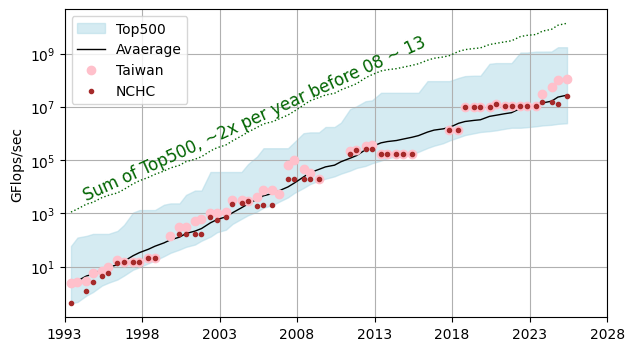

In [268]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sdf = pd.DataFrame(summary_list)
fig, ax = plt.subplots(1,1,figsize=(7,4))
plt.plot(sdf['date'], sdf['sum'], ':', color='darkgreen', lw=1)
plt.fill_between(sdf['date'], sdf['min'], sdf['max'], color='lightblue', alpha=0.5, label = "Top500")
plt.plot(sdf['date'], sdf['avg'], color='k', lw=1, label = "Avaerage")
plt.plot(sdf['date'], sdf['tw'], 'o', color='pink', label = "Taiwan")
plt.plot(sdf['date'], sdf['nchc'], '.', color='brown', label = "NCHC")
ax.annotate("Sum of Top500, ~2x per year before 08 ~ 13", rotation=24.5, xy=(pd.Timestamp("1994-01-01"), 3e3), color='darkgreen', fontsize=12)
#ax.annotate("Average", xy=(pd.Timestamp("2000-01-01"), 1e1), color='k', rotation=25, fontsize=12)
plt.ylabel("GFlops/sec")
plt.xlim(datetime.datetime.strptime("1993_06", "%Y_%m").date())
ax.xaxis.set_major_locator(mdates.YearLocator(base=5, month=5, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xticks(pd.date_range("1993-01-01", "2028-11-01", freq="5YS"))
plt.grid()
plt.legend(loc="upper left")
plt.yscale('log')
plt.savefig("top500hist.png", dpi=300, bbox_inches='tight')

## Top500 history : another way

In [70]:

def process_plot(fname):
    file = os.path.join(EXCELS_PATH, fname)
    year, mon = int(fname[7:11]), int(fname[12:14])
    #print(f"--- Parsed {file} {year} {mon} ..")
    df = pd.read_excel(file, header=0)
    if len(df) > 500:
       df = pd.read_excel(file, skiprows=1)

    df.columns = df.columns.str.lower()   ## make all lower case
    #print(df.columns)
    
    frmax = 1 
    krmax = 'rmax' 
    if year >=2017:  
        krmax = 'rmax [tflop/s]'
        frmax = 1e3

    plt.plot(df['rank'], frmax*df[krmax], ':', label = year, markersize=3)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


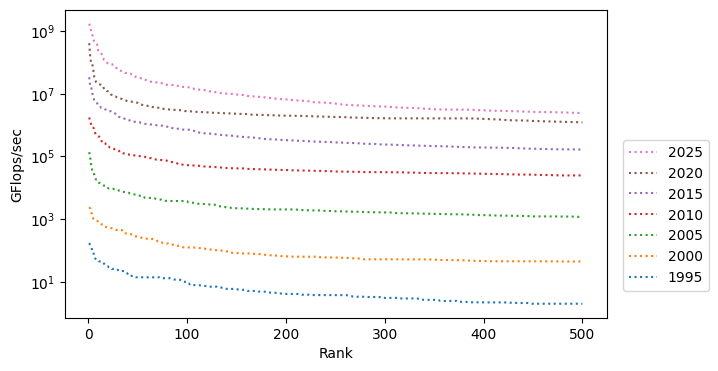

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(7,4))
for i, file in enumerate(excel_files):
    if i%10 == 4: process_plot(file)

plt.ylabel("GFlops/sec")
plt.xlabel("Rank")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.2, 0.6), loc='upper right')
plt.yscale('log')
plt.savefig("top500hist2.png", dpi=300, bbox_inches='tight')

In [49]:

def process_ploteff(fname):
    file = os.path.join(EXCELS_PATH, fname)
    year, mon = int(fname[7:11]), int(fname[12:14])
    #print(f"--- Parsed {file} {year} {mon} ..")
    df = pd.read_excel(file, header=0)
    if len(df) > 500:
       df = pd.read_excel(file, skiprows=1)

    df.columns = df.columns.str.lower()   ## make all lower case
    #print(df.columns)
    
    frmax = 1e-3 
    krmax = 'rmax' 
    kpower = 'power' 
    kacc = 'accelerator' 
    if year >= 2012:  
        kacc = 'accelerator/co-processor'
    if year >= 2017:  
        krmax = 'rmax [tflop/s]'
        kpower = 'power (kw)'
        frmax = 1

    sdf = df[df[kpower]>1e-30]  
    plt.plot(sdf['rank'], frmax*sdf[krmax]/sdf[kpower], '.', label = year)


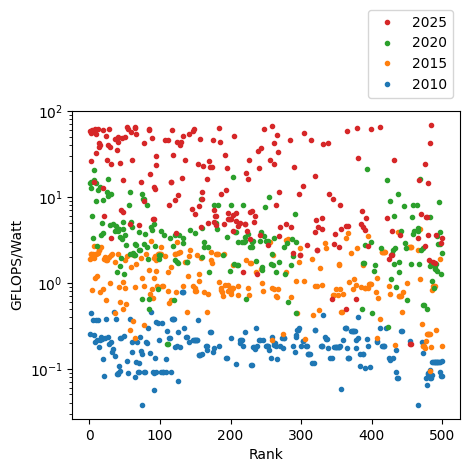

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(5,4))
for i, file in enumerate(excel_files):
    year, mon = int(file[7:11]), int(file[12:14])
    if year < 2008: continue  ## has power only after 2008 
    if i%10 == 4: process_ploteff(file)
    #if i%10 == 4: process_ploteff(file)

plt.ylabel("GFLOPS/Watt")
plt.xlabel("Rank")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1., 1.35), loc='upper right')
plt.yscale('log')
plt.savefig("powereff2.png", dpi=300, bbox_inches='tight')

## History of energy efficiency

In [270]:
def process_power(fname):
    file = os.path.join(EXCELS_PATH, fname)
    year, mon = int(fname[7:11]), int(fname[12:14])
    df = pd.read_excel(file, header=0)
    if len(df) > 500:     ### some has first row empty
       df = pd.read_excel(file, skiprows=1)

    df.columns = df.columns.str.lower()   ## make all lower case
    
    frmax = 1e-3 
    krmax = 'rmax' 
    kpower = 'power' 
    kacc = 'accelerator' 
    if year >= 2012:  
        kacc = 'accelerator/co-processor'
    if year >= 2017:  
        krmax = 'rmax [tflop/s]'
        kpower = 'power (kw)'
        frmax = 1

    sdf = df[df[kpower]>1e-30]
    fpw_array = np.array((frmax*sdf[krmax]/sdf[kpower]).tolist())
    q25, q75  = np.percentile(fpw_array, [25, 75])

    stats = {
        "date": datetime.datetime.strptime(fname[7:14], "%Y_%m").date(),
        "top1": np.array(frmax*df.iloc[0][krmax]/df.iloc[0][kpower]),
        "top2": np.array(frmax*df.iloc[1][krmax]/df.iloc[1][kpower]),
        "top3": np.array(frmax*df.iloc[2][krmax]/df.iloc[2][kpower]),
        "avg": fpw_array.mean(),
        "max": fpw_array.max(),
        "min": fpw_array.min(),
        "med": np.median(fpw_array),
        "q25": q25,
        "q75": q75
    } 

    #print((sdf[krmax]/sdf[kpower]).tolist())
    #print(df[kpower].tolist())
    
    return stats

In [271]:
summary_list = []
for file in excel_files:
    year, mon = int(file[7:11]), int(file[12:14])
    if year < 2008: continue  ## has power only after 2008 
    print(f"--- Parsed {file} {year} {mon} ..")
    stats = process_power(file)
    summary_list.append(stats)

#print(summary_list)

--- Parsed TOP500_2008_06.xlsx 2008 6 ..
--- Parsed TOP500_2008_11.xlsx 2008 11 ..
--- Parsed TOP500_2009_06.xlsx 2009 6 ..
--- Parsed TOP500_2009_11.xlsx 2009 11 ..


/tmp/ipykernel_4168782/3113974367.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  "top3": np.array(frmax*df.iloc[2][krmax]/df.iloc[2][kpower]),
/tmp/ipykernel_4168782/3113974367.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  "top2": np.array(frmax*df.iloc[1][krmax]/df.iloc[1][kpower]),


--- Parsed TOP500_2010_06.xlsx 2010 6 ..
--- Parsed TOP500_2010_11.xlsx 2010 11 ..
--- Parsed TOP500_2011_06.xlsx 2011 6 ..
--- Parsed TOP500_2011_11.xlsx 2011 11 ..
--- Parsed TOP500_2012_06.xlsx 2012 6 ..
--- Parsed TOP500_2012_11.xlsx 2012 11 ..
--- Parsed TOP500_2013_06.xlsx 2013 6 ..
--- Parsed TOP500_2013_11.xlsx 2013 11 ..
--- Parsed TOP500_2014_06.xlsx 2014 6 ..
--- Parsed TOP500_2014_11.xlsx 2014 11 ..
--- Parsed TOP500_2015_06.xlsx 2015 6 ..
--- Parsed TOP500_2015_11.xlsx 2015 11 ..
--- Parsed TOP500_2016_06.xlsx 2016 6 ..
--- Parsed TOP500_2016_11.xlsx 2016 11 ..
--- Parsed TOP500_2017_06.xlsx 2017 6 ..
--- Parsed TOP500_2017_11.xlsx 2017 11 ..
--- Parsed TOP500_2018_06.xlsx 2018 6 ..
--- Parsed TOP500_2018_11.xlsx 2018 11 ..
--- Parsed TOP500_2019_06.xlsx 2019 6 ..
--- Parsed TOP500_2019_11.xlsx 2019 11 ..
--- Parsed TOP500_2020_06.xlsx 2020 6 ..
--- Parsed TOP500_2020_11.xlsx 2020 11 ..
--- Parsed TOP500_2021_06.xlsx 2021 6 ..
--- Parsed TOP500_2021_11.xlsx 2021 11 ..
--- 

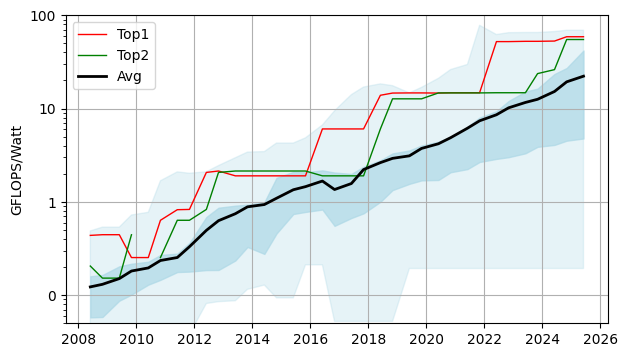

In [274]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

sdf = pd.DataFrame(summary_list)
fig, ax = plt.subplots(1,1,figsize=(7,4))
plt.plot(sdf['date'], sdf['top1'], color='red', lw=1, label = "Top1")
plt.plot(sdf['date'], sdf['top2'], color='green', lw=1, label = "Top2")
plt.plot(sdf['date'], sdf['avg'], color='k', lw=2, label = "Avg")
plt.fill_between(sdf['date'], sdf['min'], sdf['max'], color='lightblue', alpha=0.3)
plt.fill_between(sdf['date'], sdf['q25'], sdf['q75'], color='lightblue', alpha=0.7)

plt.ylabel("GFLOPS/Watt")
plt.ylim(5e-2,100)
plt.grid()
plt.legend()
plt.yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: f"{int(val):d}"))
plt.savefig("powereff.png", dpi=300, bbox_inches='tight')

In [149]:
## Coaccer

In [214]:
def process_acc(fname):
    file = os.path.join(EXCELS_PATH, fname)
    year, mon = int(fname[7:11]), int(fname[12:14])
    df = pd.read_excel(file, header=0)
    if len(df) > 500:     ### some has first row empty
       df = pd.read_excel(file, skiprows=1)

    df.columns = df.columns.str.lower()   ## make all lower case
    #print(df.columns)

    kacc = 'accelerator' 
    if year >= 2012:  
        kacc = 'accelerator/co-processor'

    #try:   print(df.loc[0:5, [kacc, 'name',  'site']])
    #except: print(df.loc[0:5, [kacc, 'site']])
    sdf = df[df[kacc].notna()]
    print(sdf[kacc].tolist())
    
    stats = {
        "date": datetime.datetime.strptime(fname[7:14], "%Y_%m").date(),
        "nv": len(sdf[sdf[kacc].str.lower().str.startswith("nvidia")]),
        "amd": len(sdf[sdf[kacc].str.lower().str.startswith("amd")]),
        "intel": len(sdf[sdf[kacc].str.lower().str.startswith("intel")]),
        "acc": len(sdf)
    } 

    #print((sdf[krmax]/sdf[kpower]).tolist())
    #print(df[kpower].tolist())
    
    return stats

In [215]:
summary_list = []
for file in excel_files:
    year, mon = int(file[7:11]), int(file[12:14])
    if year < 2011: continue  ## has acc only after 2011 
    print(f"--- Parsed {file} {year} {mon} ..")
    stats = process_acc(file)
    summary_list.append(stats)

print(summary_list)

--- Parsed TOP500_2011_06.xlsx 2011 6 ..
['NVIDIA 2050', 'NVIDIA 2050', 'NVIDIA 2050', 'IBM PowerXCell 8i', 'NVIDIA 2070', 'ATI GPU', 'NVIDIA 2050', 'NVIDIA 2070', 'IBM PowerXCell 8i', 'NVIDIA 2050', 'NVIDIA 2050', 'NVIDIA 2070', 'NVIDIA 2070', 'NVIDIA 2050', 'NVIDIA 2070', 'IBM PowerXCell 8i', 'IBM PowerXCell 8i', 'IBM PowerXCell 8i', 'ATI GPU']
--- Parsed TOP500_2011_11.xlsx 2011 11 ..
['NVIDIA 2050', 'NVIDIA 2050', 'NVIDIA 2050', 'IBM PowerXCell 8i', 'NVIDIA 2050', 'NVIDIA 2070', 'NVIDIA 2050', 'ATI GPU', 'NVIDIA 2090', 'NVIDIA 2070', 'IBM PowerXCell 8i', 'NVIDIA 2050', 'NVIDIA 2090', 'NVIDIA 2070', 'NVIDIA 2070', 'NVIDIA 2090', 'NVIDIA 2050', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2090', 'NVIDIA 2050', 'NVIDIA 2050', 'NVIDIA 2070', 'NVIDIA 2070', 'NVIDIA 2070', 'NVIDIA 2050', 'ATI GPU', 'NVIDIA 2090']
--- Parsed TOP500_2

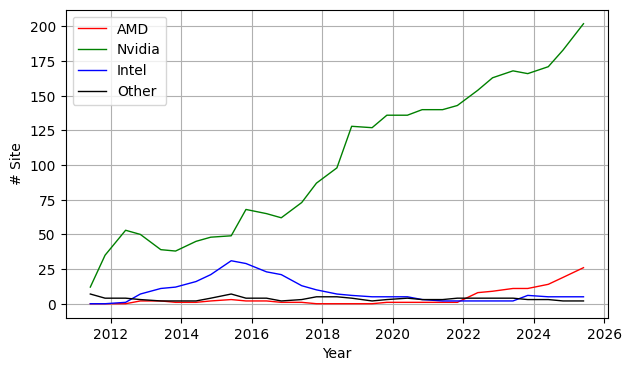

In [216]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

sdf = pd.DataFrame(summary_list)
fig, ax = plt.subplots(1,1,figsize=(7,4))
plt.plot(sdf['date'], sdf['amd'], color='red', lw=1, label = "AMD")
plt.plot(sdf['date'], sdf['nv'], color='green', lw=1, label = "Nvidia")
plt.plot(sdf['date'], sdf['intel'], color='blue', lw=1, label = "Intel")
plt.plot(sdf['date'], sdf['acc']-sdf['nv']-sdf['amd']-sdf['intel'], color='k', lw=1, label = "Other")

plt.ylabel("# Site")
plt.xlabel("Year")
#plt.ylim(5e-2,100)
plt.grid()
plt.legend()
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: f"{int(val):d}"))
plt.savefig("ac.png", dpi=300, bbox_inches='tight')